<a href="https://colab.research.google.com/github/ssv273/NN_intro/blob/master/HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Model
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.layers import Dense, Flatten, Reshape, Input, AveragePooling2D, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization,RepeatVector, LSTM
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


основная модель MNIST-MNIST

In [0]:
def dice_coef(y_true, y_pred):
  return (2. * K.sum(y_true * y_pred)) / (K.sum(y_true) + K.sum(y_pred) + 1.)

In [0]:
def base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64]):

  img_input = Input(input_size)

  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(img_input)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D()(x)

  for i in range(level-1):
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
  x1 = x
  print(x1.shape)

  for i in range(level-1) :
    k = -(level-1)+i  

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
     
    x = Conv2D(kernel_list[k], (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

  x = Conv2DTranspose(kernel_list[0], (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(kernel_list[0], (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  model = Model(img_input, x)
   
  modelviz0=Model(img_input, x1)
  model.compile(optimizer=Adam(),
                  loss='mean_squared_error',
                  metrics=['accuracy', dice_coef])

  return model, modelviz0

In [0]:
def training_with_diff_noise(list_of_noise):
  for noise in list_of_noise:
    (xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
    xTrainMnist = xTrainMnist.astype('float32')/255

    xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

    yTrainMnist_pix = xTrainMnist.copy()
    xTrainMnist += np.random.randn(xTrainMnist.shape[0],xTrainMnist.shape[1],xTrainMnist.shape[2],xTrainMnist.shape[3]) * noise

    modelAutoMnist, m0 = base_model_Autoencoder(level = 2, input_size=(28,28,1), kernel_list=[32,64])

    hist=modelAutoMnist.fit(xTrainMnist[:10000], yTrainMnist_pix[:10000], epochs=30, batch_size=100, validation_split=0.2, verbose=0)

    plt.plot(hist.history['val_dice_coef'],'r',label='val_dice_coef')
    plt.plot(hist.history['dice_coef'],'g',label='dice_coef')
    plt.plot(hist.history['acc'],'b--',label='acc')
    plt.plot(hist.history['val_acc'],'y--',label='val_acc')
    plt.legend()
    plt.title('Encoder with noise = ' + str(noise))
    plt.show()

In [0]:
list_of_noise = [0.1, 0.4, 0.9]













(?, 7, 7, 64)





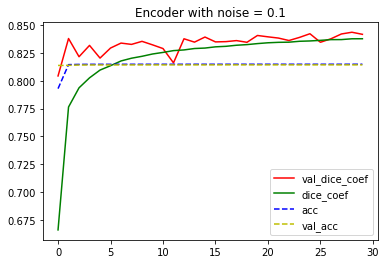

(?, 7, 7, 64)


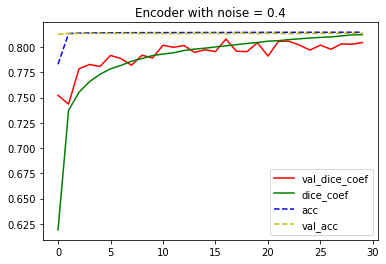

(?, 7, 7, 64)


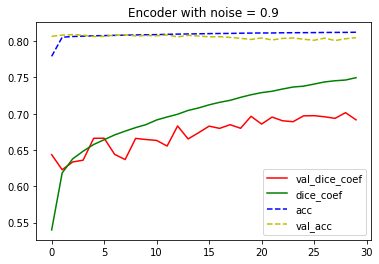

In [6]:
training_with_diff_noise(list_of_noise)

Таким образом мы видим, что с увеличением шума коэффициент Дици падает, т.е. модель всё хуже и хуже восстанавливает данные.